# Simulatie Analyse

Er zal een statistische analyse worden op verschillende data die we hadden gekregen van meerdere batchruns met verschillende parameters. Aan de hand van deze data kunnen we onze onderzoeksvraag beantwoorden.

In [1]:
# Libraries importeren 
from Classes.Person import Person
import pickle
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Dataframe importeren 
We gaan twee dataframes bekijken van onze simulatie met de volgende params:
* VoterModel
* 1000 voters
* 4 kandidaten 
* voter_type : Voter Type (Agent gedrag): [Strategisch, Honest]
* maxpolls: 6
* loyalty : 30
* strat_chance: 30 
* width:2
* height:2
* 1000 iterations/runs
* 10 steps 

Er is gekozen vor een loyalty en een strat_chance van 30%, want wij denken dat dit een realistische beeld  even van zo'n verkiezing.

In [2]:
honest = pickle.load(open("generated_files/batch_run_honest_1","rb"))
strategic = pickle.load(open("generated_files/batch_run_strategic_1","rb"))

In [3]:
honest

,Run,Polls,stratPerPollCounter,n_voters,n_candidates,voter_type,maxpolls,loyalty,strat_chance,width,height
0,1000,[{<Classes.Person.Candidate object at 0x000001...,0.0,1000,4,Honest,6,30,30,2,2
658,1000,[{<Classes.Person.Candidate object at 0x000001...,0.0,1000,4,Honest,6,30,30,2,2
659,1000,[{<Classes.Person.Candidate object at 0x000001...,0.0,1000,4,Honest,6,30,30,2,2
660,1000,[{<Classes.Person.Candidate object at 0x000001...,0.0,1000,4,Honest,6,30,30,2,2
661,1000,[{<Classes.Person.Candidate object at 0x000001...,0.0,1000,4,Honest,6,30,30,2,2
...,...,...,...,...,...,...,...,...,...,...,...
339,1000,[{<Classes.Person.Candidate object at 0x000001...,0.0,1000,4,Honest,6,30,30,2,2
340,1000,[{<Classes.Person.Candidate object at 0x000001...,0.0,1000,4,Honest,6,30,30,2,2
341,1000,[{<Classes.Person.Candidate object at 0x000001...,0.0,1000,4,Honest,6,30,30,2,2
328,1000,[{<Classes.Person.Candidate object at 0x000001...,0.0,1000,4,Honest,6,30,30,2,2


In [4]:
def getFluctuations(pollList):
    """
    Berekent de gemiddelde verandering van de votes van een kandidaat per poll.
    params:
    pollList: lijst met de resultaten van elke peiling in een run.
    """
    fluctuation = {}
    length = len(pollList)
    for cand in pollList[0]:
        fluctuation.update({cand: 0})
                    
    for cand in fluctuation:
        differences = []
        for pollId in range(length-1):
            differences.append(pollList[pollId + 1].get(cand) - pollList[pollId].get(cand))
        fluctuation.update({cand:(sum(differences) / length)})

    return fluctuation

In [5]:
def convertRuns(_data):
    """
    In deze functie gaat de data verwerkt worden waardoor het overzichtlijk is en beter leesbaare en te gebruiken.
    """
    runs = pd.DataFrame(columns=['run_id', 'cand_unique_id', 'cand_votes', 'cand_position', 'strat_perc'])
    for i, run in _data.iterrows():
        cand_fluctuations = getFluctuations(run.Polls) # bepaal de gemiddelde aantal votes per poll per kandidaat
        for cand in run.Polls[len(run.Polls)-1]:
            runs = runs.append({'run_id':i,'cand_unique_id':cand.unique_id,'cand_votes':run[1][0].get(cand),'cand_position':cand.position,'strat_perc': run[2],'fluctuation':cand_fluctuations.get(cand)},ignore_index=True)
    runs['cand_votes'] = runs['cand_votes'].convert_dtypes(int)
    return runs

In [6]:
honest_runs = convertRuns(honest)

In [7]:
strategic_runs = convertRuns(strategic)

In [8]:
honest, strategic = None, None

In [9]:
def addDistance(df:pd.DataFrame):
    """
    Afstand wordt berekent van de kandidaat ene de midden van de space.
    Dit zal gelijk zijn aan de coordinaten (1.0, 1.0)
    """
    df['distance'] = df['cand_position'].apply(lambda x: np.linalg.norm([1.0,1.0] - x))
    return df

In [10]:
honest_runs = addDistance(honest_runs)
display(honest_runs.sort_values(by=['distance']))
#print de honest_Runs die gesorteerd zijn op de hoogste naar de laagste cand_votes
display(honest_runs.sort_values(by=['cand_votes'],ascending=False))

strategic_runs = addDistance(strategic_runs)
display(strategic_runs.sort_values(by=['distance']))
##print de honest_Runs die gesorteerd zijn op de hoogste naar de laagste cand_votes
display(strategic_runs.sort_values(by=['cand_votes'],ascending=False))

,run_id,cand_unique_id,cand_votes,cand_position,strat_perc,fluctuation,distance
1495,750,3,158,"[1.0029667252722136, 1.0129282473725174]",0.0,0.0,0.013264
3779,351,3,396,"[0.9783089064643398, 1.0016480698498802]",0.0,0.0,0.021754
2381,189,1,261,"[0.9737258029780487, 0.9752003331090877]",0.0,0.0,0.036130
830,615,2,464,"[0.9647678478359383, 1.0097082185632396]",0.0,0.0,0.036545
397,694,1,410,"[1.0037509463462149, 0.9548143108988161]",0.0,0.0,0.045341
...,...,...,...,...,...,...,...
2750,62,2,72,"[0.028294907892296273, 1.9828143612282199]",0.0,0.0,1.382076
257,722,1,187,"[0.0034015222969572267, 1.9592167452530762]",0.0,0.0,1.383223
1890,817,2,125,"[1.9618003158259116, 1.9991768852532836]",0.0,0.0,1.386872
1065,923,1,29,"[0.0018302061501525024, 1.9747188670519664]",0.0,0.0,1.395142


,run_id,cand_unique_id,cand_votes,cand_position,strat_perc,fluctuation,distance
803,608,3,830,"[1.0111273100864246, 0.6299285298027872]",0.0,0.0,0.370239
2740,60,0,769,"[1.4642187192561293, 0.8701933495860297]",0.0,0.0,0.482026
797,607,1,754,"[1.0055467745659215, 1.2830038036903793]",0.0,0.0,0.283058
292,731,0,737,"[0.6132728534356227, 1.0317429250620906]",0.0,0.0,0.388028
2345,243,1,693,"[0.8786807307457005, 0.9983984931058332]",0.0,0.0,0.121330
...,...,...,...,...,...,...,...
1497,875,1,12,"[0.1576168007042844, 0.08305653502136479]",0.0,0.0,1.245148
455,708,3,10,"[1.996193420334886, 0.22123378878980438]",0.0,0.0,1.264468
802,608,2,7,"[1.7878509799523066, 0.006130502441766161]",0.0,0.0,1.268261
2742,60,2,3,"[1.9311044599993665, 1.8783819556686727]",0.0,0.0,1.280043


,run_id,cand_unique_id,cand_votes,cand_position,strat_perc,fluctuation,distance
3743,265,3,522,"[0.9933468660374423, 0.9927107017868047]",11.150000,6.666667,0.009869
352,746,0,414,"[0.9822552965674627, 1.0030235192754156]",3.483333,3.666667,0.018000
3889,316,1,312,"[1.0161227021806047, 1.022950222174909]",13.900000,15.000000,0.028047
621,531,1,223,"[0.9800205734750262, 1.0310223690224105]",0.000000,0.000000,0.036899
880,565,0,646,"[0.9921355730868235, 0.9633409188956492]",9.750000,5.833333,0.037493
...,...,...,...,...,...,...,...
1108,934,0,104,"[0.028596805948186477, 0.027590972496303046]",15.516667,-5.166667,1.374483
1699,769,3,7,"[1.96382418799875, 0.019638237222696864]",1.800000,-0.333333,1.374797
261,723,1,124,"[1.9822810676150862, 1.9664748513375665]",17.600000,-6.833333,1.378024
3194,393,2,61,"[1.9743241967058134, 0.022718030097270914]",8.883333,-2.333333,1.379996


,run_id,cand_unique_id,cand_votes,cand_position,strat_perc,fluctuation,distance
289,730,1,818,"[1.0038862895634735, 0.8839489377643217]",1.950000,1.333333,0.116116
3599,306,3,814,"[0.634566528628548, 0.8767690262576624]",1.083333,1.000000,0.385652
1468,962,0,760,"[1.0297196261301969, 1.3319564165123345]",7.900000,4.166667,0.333284
3419,449,3,740,"[0.5914173364790642, 0.7968973701842255]",3.266667,1.833333,0.456279
334,741,2,722,"[0.8850934284228542, 1.5167253233971123]",10.566667,8.000000,0.529347
...,...,...,...,...,...,...,...
2274,225,2,9,"[0.7422473913247682, 1.956896425521177]",2.550000,-0.500000,0.991003
1699,769,3,7,"[1.96382418799875, 0.019638237222696864]",1.800000,-0.333333,1.374797
3818,361,2,5,"[1.8519881950007004, 0.01889824582278332]",3.633333,-0.500000,1.299402
700,520,0,5,"[0.049843983375458034, 0.07252282795457599]",1.800000,-0.500000,1.327784


Aan de hand van pairplots gaan we de realities zien tussen de cand_votes en distance bij honest_runs. Bovendien gaan we de relatie zien van *'cand_votes','distance','strat_perc','fluctuation'* bij strategic_runs

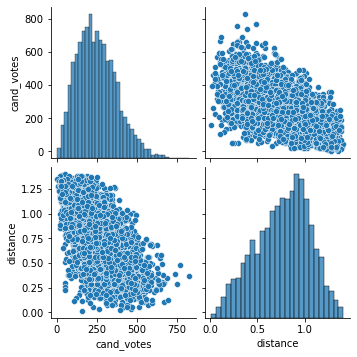

In [11]:
display(sns.pairplot(honest_runs[['cand_votes','distance']]))

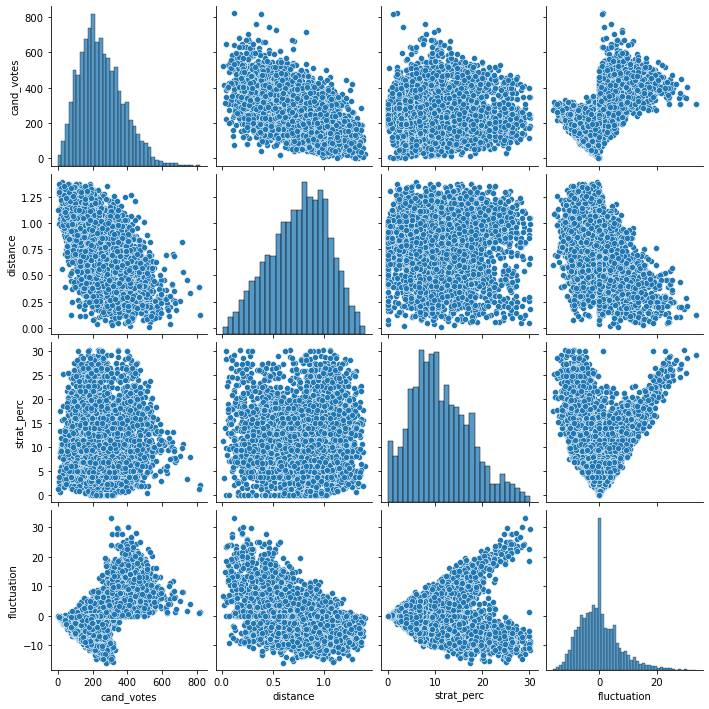

In [12]:
display(sns.pairplot(strategic_runs[['cand_votes','distance','strat_perc','fluctuation']]))

In [13]:
# display(honest_runs[['cand_votes']].describe(include='all'))
# display(honest_runs[['cand_votes']].plot.box())
# display(strategic_runs[['cand_votes']].describe(include='all'))
# display(strategic_runs[['cand_votes']].plot.box())

# Effect van plurality voting op mensen dat niet op hun eerste voorkeur kiest.

Hier laten we een scatter plot zien met de gemiddelde fluctuatie in stemmen per pijlingsronden.
Wat hier uit te zien is is dat de kans dat je stemmen toe krijgt van strategische stemmers later in het stem proces steeds kleiner wordt deste verder je van het midden van het politeke centrum af staat.
<br><br>
De X-as van dit model laat de afstand van een kandidaad naar het centrum zien.<br>
De Y-as laat hier de hoeveelheid stemmen zien die een kandidaat krijg/verliest gemiddeld per pijling.

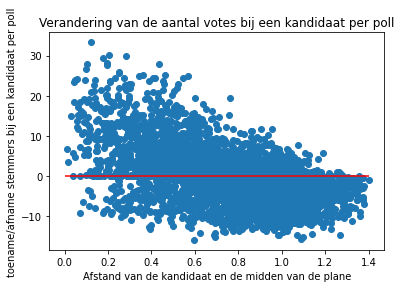

In [14]:
plt.figure()
plt.scatter(data=strategic_runs, x='distance',y='fluctuation')
plt.hlines(y=0, xmin = 0.0, xmax = 1.4, color='r')

plt.title("Verandering van de aantal votes bij een kandidaat per poll")
plt.ylabel("toename/afname stemmers bij een kandidaat per poll")
plt.xlabel("Afstand van de kandidaat en de midden van de plane")
plt.show()

Ons model gebruikt meerdere parameters om te bepalen wanneer een stemmer een strategische stem wilt uitbrengen.
<br>
Hier is goed te zien dat er soms nog wat uitschieters zijn en er veel stemmers strategisch gaan stemmen, maar veel belangrijker dat de mediaan mooi rond de 10% ligt.
<br>
Zoals uit bronnen naar voren komt is het uiteidenlijke stemgedrag van mensen 9% strategisch.

In [15]:
strategic_runs[['strat_perc']].describe()

,strat_perc
count,4000.000000
mean,11.254500
std,6.283224
min,0.000000
25%,6.679167
50%,10.316667
75%,15.337500
max,30.250000


De frequentie verdeling van fluctuatie.<br>

Text(0.5, 1.0, 'Frequentieverdeling van de fluctuatie van de aantal votes')

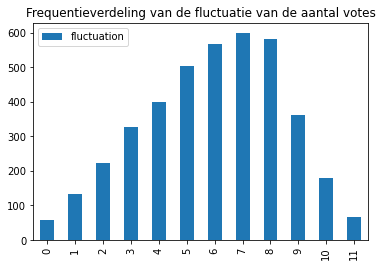

In [73]:
count = strategic_runs.groupby([pd.cut(strategic_runs['distance'],12)])[['fluctuation']].count().reset_index()
ax =count[['fluctuation']].plot.bar(stacked=True)
ax.set_title("Frequentieverdeling van de fluctuatie van de aantal votes")

Hier is een Barplot te zien waar een gemiddelde waarde van de fluctuatie te zien is in verschillende bins.<br>
We hebben gekozen voor 12 bins.<br>

Text(0, 0.5, 'Votes krijgen/verliezen per poll')

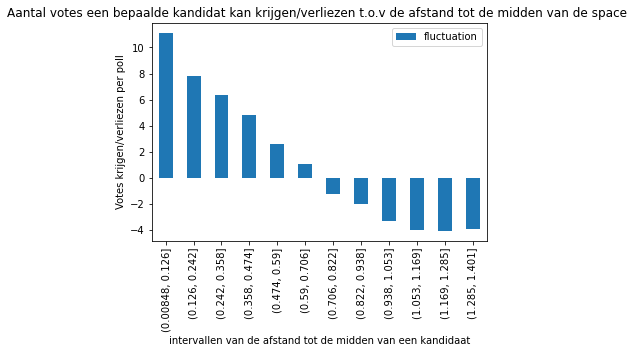

In [72]:
sums = strategic_runs.groupby([pd.cut(strategic_runs['distance'],12)])[['fluctuation']].mean().reset_index()
ax = sums.plot.bar(x='distance',y='fluctuation',rot=90)
ax.set_title("Aantal votes een bepaalde kandidat kan krijgen/verliezen t.o.v de afstand tot de midden van de space ")
ax.set_xlabel("intervallen van de afstand tot de midden van een kandidaat")
ax.set_ylabel("Votes krijgen/verliezen per poll")

Zo is er duidelijk te zien dat een kandidaad die dichter bij het centrum zit over het algemeen meer stemmen krijgt mochten mensen besluiten strategisch te gaans stemmen.<br>
Het omkeer punt zit rond de 0.7 afstand.

# Effect van peilingen op het stemgedrag van stemmers met plurality voting.

Voor deze onderzoeksvraag gaan we kijken naar de effect van de aantal peilingen in een verkiezing op het stemgedrag van stemmers ten opzichte van de type kandidaat binnen de space met Plurality voting. Voor deze experiment hadden we aanname genomen dat een voting process ongeveer 2 weken zal duren. 
Om de effect te bepalen van de peilingen op het stemgedrag gaan we verschillende batch runs uitvoeren waar we gaan kijken naar de verkiezingen met de volgende aantal polls:
- 1 polls : Er wordt 1 peiling in de verkiezieng gepubliceerd
- 2 polls: Er wordt 2 peiling in de verkiezieng gepubliceerd ( on
- 6 polls: Er wordt 6 peiling in de verkiezing gepubliceerd( ongeveer 3 poll per week
- 14 polls: Er wordt dagelijks een peiling gepubliceerd.

In [18]:
# Load dataframes
raw_poll_1 = pickle.load(open("generated_files/batch_run_strategic_2_1poll","rb"))
raw_poll_2 = pickle.load(open("generated_files/batch_run_strategic_2_2poll","rb"))
poll_6 = strategic_runs
raw_poll_14 = pickle.load(open("generated_files/batch_run_strategic_2_14poll","rb"))

In [19]:
# Convert dataframes
poll_1 = convertRuns(raw_poll_1)
poll_1 = addDistance(poll_1)


poll_2 = convertRuns(raw_poll_2)
poll_2 = addDistance(poll_2)

poll_14 = convertRuns(raw_poll_14)
poll_14 = addDistance(poll_14)

Om het effect van peilingen te bekijken op het stemgedrag van de stemmers, gaan we onze kolom distance verdelen in 5 groepen. Hier kunnen we 5 type kandidaat in onze space definieren. De gemiddelde aantal stemmers per bins/type kandidaat
wordt bepaald en gevisualiseerd in een bar plot. 

Text(0.5, 1.0, 'Gemiddelde votes per type kandidaat bij verkiezingen met 1 peilingen')

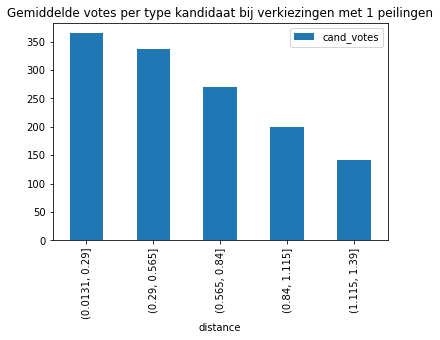

In [69]:
poll_1_mean = poll_1.groupby([pd.cut(poll_1['distance'],5)])[['cand_votes']].mean()
poll_1_mean['stdev_cand_votes'] = poll_1.groupby([pd.cut(poll_1['distance'],5)])[['cand_votes']].std()
poll_1_mean = poll_1_mean.reset_index()
ax= poll_1_mean.plot.bar(x= 'distance',y='cand_votes',rot=90)
ax.set_title("Gemiddelde votes per type kandidaat bij verkiezingen met 1 peilingen")

Text(0.5, 1.0, 'Gemiddelde votes per type kandidaat bij verkiezingen met 2 peilingen')

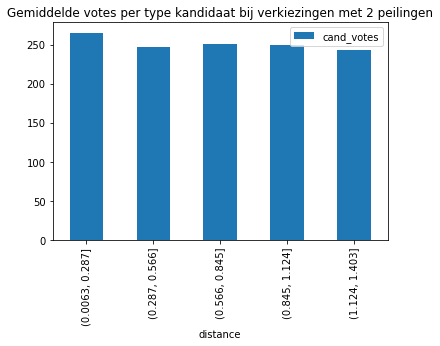

In [66]:
poll_2_mean = poll_1.groupby([pd.cut(poll_2['distance'],5)])[['cand_votes']].mean()
poll_2_mean['stdev_cand_votes'] = poll_2.groupby([pd.cut(poll_2['distance'],5)])[['cand_votes']].std()
poll_2_mean = poll_2_mean.reset_index()
ax= poll_2_mean.plot.bar(x= 'distance',y='cand_votes',rot=90)
ax.set_title("Gemiddelde votes per type kandidaat bij verkiezingen met 2 peilingen")

Text(0.5, 1.0, 'Gemiddelde votes per type kandidaat bij verkiezingen met 6 peilingen')

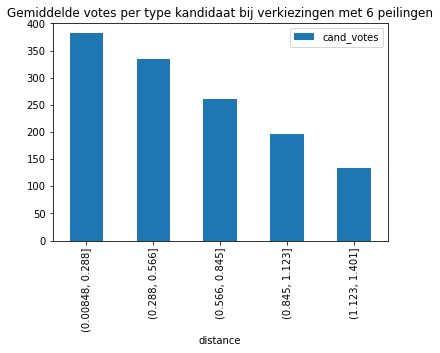

In [74]:
poll_6_mean = poll_6.groupby([pd.cut(poll_6['distance'],5)])[['cand_votes']].mean()
poll_6_mean['stdev_cand_votes'] = poll_6.groupby([pd.cut(poll_6['distance'],5)])[['cand_votes']].std()
poll_6_mean = poll_6_mean.reset_index()
ax= poll_6_mean.plot.bar(x= 'distance',y='cand_votes',rot=90)
ax.set_title("Gemiddelde votes per type kandidaat bij verkiezingen met 6 peilingen")

Text(0.5, 1.0, 'Gemiddelde votes per type kandidaat bij verkiezingen met 14 peilingen')

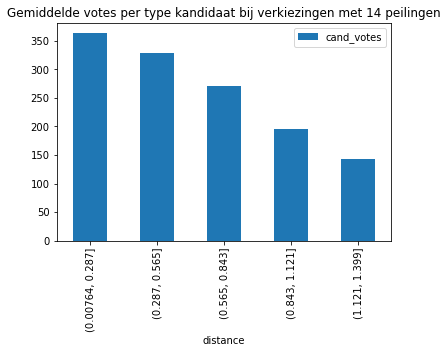

In [75]:
poll_14_mean = poll_14.groupby([pd.cut(poll_14['distance'],5)])[['cand_votes']].mean()
poll_14_mean['stdev_cand_votes'] = poll_14.groupby([pd.cut(poll_14['distance'],5)])[['cand_votes']].std()
poll_14_mean = poll_14_mean.reset_index()
ax= poll_14_mean.plot.bar(x= 'distance',y='cand_votes',rot=90)
ax.set_title("Gemiddelde votes per type kandidaat bij verkiezingen met 14 peilingen")

In [59]:
display(poll_1_mean)
display(poll_2_mean)
display(poll_6_mean)
display(poll_14_mean)

,cand_votes,stdev_cand_votes
distance,,
"(0.0131, 0.29]",364.752941,132.251720
"(0.29, 0.565]",336.192673,116.830462
"(0.565, 0.84]",269.293524,104.274746
"(0.84, 1.115]",198.744741,92.648451
"(1.115, 1.39]",141.511450,75.825696


,cand_votes,stdev_cand_votes
distance,,
"(0.0063, 0.287]",365.555985,134.867462
"(0.287, 0.566]",335.063492,111.750271
"(0.566, 0.845]",266.998371,101.926312
"(0.845, 1.124]",197.487770,93.517423
"(1.124, 1.403]",135.234332,77.831292


,cand_votes,stdev_cand_votes
distance,,
"(0.00848, 0.288]",381.518382,132.616083
"(0.288, 0.566]",334.057592,120.365169
"(0.566, 0.845]",260.137375,102.999301
"(0.845, 1.123]",196.098514,91.271738
"(1.123, 1.401]",134.130890,81.394626


,cand_votes,stdev_cand_votes
distance,,
"(0.00764, 0.287]",363.014035,131.395623
"(0.287, 0.565]",327.917738,118.218374
"(0.565, 0.843]",270.306438,101.976690
"(0.843, 1.121]",196.394909,92.925533
"(1.121, 1.399]",142.244332,80.443959


Aan de hand van de barplot en de bovenstaande data kunnen we concluderen dat kandidaten met een *neutrale politieke visie* hebben meer kans om stemmers te krijgen.Bovendien is te zien dat hoe meer peilingen er wordt gepubliceerd, kandidaten krijegen en verliezen meer stemmers gedurende zo'n verkiezing.

Hoe meer peilingen, hoe meer kans een stemmer heeft om een strategie te gebruiken en zijn keuze veranderen.
De aantal peilingen heeft dus een bepaalde invloed op de stemmers, waar ze voor elke poll meer meer open staan om te stemmen voor een kandidaat buiten hun politieke standpunten.